### Importing needed libraries and connecting SQLite.

In [1]:
%load_ext sql
%sql sqlite:///players.db

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Extracting our data from SQLite.

In [3]:
%%sql
SELECT *
FROM Players_data
LIMIT 5;

 * sqlite:///players.db
Done.


ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,ClubLogo,Value,Wage,Special,PreferredFoot,InternationalReputation,WeakFoot,SkillMoves,WorkRate,BodyType,RealFace,Position,JerseyNumber,Joined,LoanedFrom,ContractValidUntil,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,BestPosition,BestOverallRating,ReleaseClause,DefensiveAwareness
212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,€107.5M,€250K,2341,Right,3.0,3.0,4.0,High/ High,Unique,Yes,"<span class=""pos pos18"">CAM",18.0,"Jan 30, 2020",nan,2025,179cm,69kg,87.0,83.0,64.0,91.0,87.0,83.0,87.0,87.0,88.0,87.0,77.0,73.0,80.0,91.0,79.0,89.0,73.0,91.0,70.0,89.0,78.0,66.0,87.0,90.0,91.0,87.0,nan,73.0,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,€93M,€140K,2314,Right,4.0,4.0,3.0,High/ Medium,Unique,Yes,"<span class=""pos pos11"">LDM",8.0,"Jul 1, 2018",nan,2026,189cm,82kg,75.0,82.0,86.0,86.0,69.0,84.0,76.0,75.0,84.0,87.0,78.0,83.0,76.0,88.0,71.0,85.0,79.0,88.0,88.0,86.0,81.0,86.0,85.0,84.0,60.0,82.0,nan,85.0,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,€44.5M,€135K,2307,Right,5.0,4.0,3.0,High/ Medium,Unique,Yes,"<span class=""pos pos24"">RS",9.0,"Sep 25, 2020",nan,2022,182cm,83kg,80.0,93.0,84.0,83.0,90.0,83.0,86.0,82.0,77.0,86.0,76.0,69.0,75.0,92.0,78.0,89.0,69.0,78.0,85.0,88.0,87.0,41.0,91.0,84.0,83.0,87.0,nan,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,€125.5M,€350K,2304,Right,4.0,5.0,4.0,High/ High,Unique,Yes,"<span class=""pos pos13"">RCM",17.0,"Aug 30, 2015",nan,2025,181cm,70kg,94.0,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,91.0,76.0,76.0,79.0,91.0,78.0,91.0,63.0,89.0,74.0,91.0,76.0,66.0,88.0,94.0,83.0,89.0,nan,65.0,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,€37M,€45K,2292,Left,2.0,3.0,4.0,High/ High,Stocky (170-185),No,"<span class=""pos pos7"">LB",19.0,"Sep 14, 2020",nan,2024,172cm,69kg,87.0,66.0,58.0,82.0,68.0,87.0,88.0,75.0,78.0,88.0,77.0,76.0,83.0,83.0,90.0,82.0,63.0,90.0,80.0,81.0,84.0,79.0,81.0,82.0,76.0,87.0,nan,84.0,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0


In [4]:
data=%sql SELECT ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,PreferredFoot,Height,Weight,Crossing,Finishing,ShortPassing,Dribbling,FKAccuracy,LongPassing,BallControl,Acceleration,Agility,Balance,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,BestPosition FROM Players_data;

 * sqlite:///players.db
Done.


In [5]:
data=pd.DataFrame(data,columns=["ID","Name","Age","Nationality"
                           ,"Overall","Potential","Club"
                           ,"Value","Wage","PreferredFoot"
                           ,"Height","Weight","Crossing"
                           ,"Finishing","ShortPassing","Dribbling"
                           ,"FKAccuracy","LongPassing","BallControl"
                           ,"Acceleration","Agility","Balance"
                           ,"Jumping","Stamina","Strength"
                           ,"LongShots","Aggression","Interceptions"
                           ,"Positioning","Vision","Penalties"
                           ,"Composure","GKDiving","GKHandling"
                           ,"GKKicking","GKPositioning","GKReflexes","BestPosition"])
df=data.copy()
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16710 entries, 0 to 16709
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             16710 non-null  int64  
 1   Name           16710 non-null  object 
 2   Age            16710 non-null  int64  
 3   Nationality    16710 non-null  object 
 4   Overall        16710 non-null  int64  
 5   Potential      16710 non-null  int64  
 6   Club           16446 non-null  object 
 7   Value          16710 non-null  object 
 8   Wage           16710 non-null  object 
 9   PreferredFoot  16710 non-null  object 
 10  Height         16710 non-null  object 
 11  Weight         16710 non-null  object 
 12  Crossing       16710 non-null  float64
 13  Finishing      16710 non-null  float64
 14  ShortPassing   16710 non-null  float64
 15  Dribbling      16710 non-null  float64
 16  FKAccuracy     16710 non-null  float64
 17  LongPassing    16710 non-null  float64
 18  BallCo

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,PreferredFoot,...,Positioning,Vision,Penalties,Composure,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,BestPosition
0,212198,Bruno Fernandes,26,Portugal,88,89,Manchester United,€107.5M,€250K,Right,...,87,90,91.0,87,12.0,14.0,15.0,8.0,14.0,CAM
1,209658,L. Goretzka,26,Germany,87,88,FC Bayern München,€93M,€140K,Right,...,85,84,60.0,82,13.0,8.0,15.0,11.0,9.0,CM
2,176580,L. Suárez,34,Uruguay,88,88,Atlético de Madrid,€44.5M,€135K,Right,...,91,84,83.0,87,27.0,25.0,31.0,33.0,37.0,ST
3,192985,K. De Bruyne,30,Belgium,91,91,Manchester City,€125.5M,€350K,Right,...,88,94,83.0,89,15.0,13.0,5.0,10.0,13.0,CM
4,224334,M. Acuña,29,Argentina,84,84,Sevilla FC,€37M,€45K,Left,...,81,82,76.0,87,8.0,14.0,13.0,13.0,14.0,LB


In [6]:
df.describe(exclude=["int64","float64"]).T

,count,unique,top,freq
Name,16710,16089,J. Rodríguez,10
Nationality,16710,168,England,1845
Club,16446,869,AC Milan,47
Value,16710,254,€1.2M,586
Wage,16710,134,€2K,2316
...,...,...,...,...
Interceptions,16710,90,65,540
Positioning,16710,95,58,560
Vision,16710,86,58,585
Composure,16710,84,65,708


In [7]:
print(df.describe(exclude="object").T)

                 count           mean           std   min        25%  \
ID             16710.0  220560.467923  38496.607959  27.0  203891.25   
Age            16710.0      25.727409      5.048910  16.0      22.00   
Overall        16710.0      67.646320      6.457695  28.0      63.00   
Potential      16710.0      72.572292      5.688085  38.0      69.00   
Crossing       16710.0      52.212448     17.772348   7.0      42.00   
Finishing      16710.0      48.725075     19.401715   3.0      34.00   
ShortPassing   16710.0      61.314423     13.665353   8.0      57.00   
Dribbling      16710.0      58.591203     17.925005   5.0      54.00   
FKAccuracy     16710.0      45.074087     17.596471   4.0      33.00   
LongPassing    16710.0      55.454877     14.494716   9.0      47.00   
BallControl    16710.0      61.387433     15.673348   8.0      58.00   
Acceleration   16710.0      65.684919     15.005583  13.0      58.00   
Stamina        16710.0      64.204548     15.575110  13.0      5

In [8]:
df.isnull().sum()

ID                 0
Name               0
Age                0
Nationality        0
Overall            0
Potential          0
Club             264
Value              0
Wage               0
PreferredFoot      0
Height             0
Weight             0
Crossing           0
Finishing          0
ShortPassing       0
Dribbling          0
FKAccuracy         0
LongPassing        0
BallControl        0
Acceleration       0
Agility            0
Balance            0
Jumping            0
Stamina            0
Strength           0
LongShots          0
Aggression         0
Interceptions      0
Positioning        0
Vision             0
Penalties          0
Composure          0
GKDiving           0
GKHandling         0
GKKicking          0
GKPositioning      0
GKReflexes         0
BestPosition       0
dtype: int64

### Club column has nans values. This nans means, player is free agency. There is some nans at other variables. 
### Let's replace Club nans variable's with "FreeAgency".

In [9]:
df["Club"].replace(np.nan, "FreeAgency", inplace = True)

In [10]:
df["Club"].isnull().sum()

0

### We handled nans. Now we'll change different dtypes. Like Value's dtype which it's object. Cause there is "€", "M" and "K" symbols. But Value variable should be float64. 
### Let's change inappropriate dtypes and clean their symbols.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16710 entries, 0 to 16709
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             16710 non-null  int64  
 1   Name           16710 non-null  object 
 2   Age            16710 non-null  int64  
 3   Nationality    16710 non-null  object 
 4   Overall        16710 non-null  int64  
 5   Potential      16710 non-null  int64  
 6   Club           16710 non-null  object 
 7   Value          16710 non-null  object 
 8   Wage           16710 non-null  object 
 9   PreferredFoot  16710 non-null  object 
 10  Height         16710 non-null  object 
 11  Weight         16710 non-null  object 
 12  Crossing       16710 non-null  float64
 13  Finishing      16710 non-null  float64
 14  ShortPassing   16710 non-null  float64
 15  Dribbling      16710 non-null  float64
 16  FKAccuracy     16710 non-null  float64
 17  LongPassing    16710 non-null  float64
 18  BallCo

In [12]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,PreferredFoot,...,Positioning,Vision,Penalties,Composure,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,BestPosition
0,212198,Bruno Fernandes,26,Portugal,88,89,Manchester United,€107.5M,€250K,Right,...,87,90,91.0,87,12.0,14.0,15.0,8.0,14.0,CAM
1,209658,L. Goretzka,26,Germany,87,88,FC Bayern München,€93M,€140K,Right,...,85,84,60.0,82,13.0,8.0,15.0,11.0,9.0,CM
2,176580,L. Suárez,34,Uruguay,88,88,Atlético de Madrid,€44.5M,€135K,Right,...,91,84,83.0,87,27.0,25.0,31.0,33.0,37.0,ST
3,192985,K. De Bruyne,30,Belgium,91,91,Manchester City,€125.5M,€350K,Right,...,88,94,83.0,89,15.0,13.0,5.0,10.0,13.0,CM
4,224334,M. Acuña,29,Argentina,84,84,Sevilla FC,€37M,€45K,Left,...,81,82,76.0,87,8.0,14.0,13.0,13.0,14.0,LB


In [13]:
endswith_value=[]
for i in df["Value"]:
    if i.endswith("M"):
        endswith_value.append("M")
    elif i.endswith("K"):
        endswith_value.append("K")
    else:
        endswith_value.append("N")
df["endswith_value"]=endswith_value

In [14]:
df["Value"]=df["Value"].str.lstrip("€")
df["Value"]=df["Value"].str.rstrip("M")
df["Value"]=df["Value"].str.rstrip("K")

In [15]:
endswith_wage=[]
for i in df["Wage"]:
    if i.endswith("M"):
        endswith_wage.append("M")
    elif i.endswith("K"):
        endswith_wage.append("K")
    else:
        endswith_wage.append("N")
df["endswith_wage"]=endswith_wage

In [16]:
df["Wage"]=df["Wage"].str.lstrip("€")
df["Wage"]=df["Wage"].str.rstrip("M")
df["Wage"]=df["Wage"].str.rstrip("K")

In [17]:
df["Height"]=df["Height"].str.rstrip("cm")
df["Weight"]=df["Weight"].str.rstrip("kg")

In [18]:
df["Agility"]

0         80
1         76
2         75
3         79
4         83
        ... 
16705     34
16706     30
16707     36
16708     26
16709    nan
Name: Agility, Length: 16710, dtype: object

In [19]:
df["Value"]=df["Value"].astype("float64")
df["Wage"]=df["Wage"].astype("int64")
df["Height"]=df["Height"].astype("int64")
df["Weight"]=df["Weight"].astype("float64")
df["Agility"]=df["Agility"].astype("float64")
df["Balance"]=df["Balance"].astype("float64")
df["Jumping"]=df["Jumping"].astype("float64")
df["Interceptions"]=df["Interceptions"].astype("float64")
df["Positioning"]=df["Positioning"].astype("float64")
df["Vision"]=df["Vision"].astype("float64")
df["Composure"]=df["Composure"].astype("float64")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16710 entries, 0 to 16709
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              16710 non-null  int64  
 1   Name            16710 non-null  object 
 2   Age             16710 non-null  int64  
 3   Nationality     16710 non-null  object 
 4   Overall         16710 non-null  int64  
 5   Potential       16710 non-null  int64  
 6   Club            16710 non-null  object 
 7   Value           16710 non-null  float64
 8   Wage            16710 non-null  int64  
 9   PreferredFoot   16710 non-null  object 
 10  Height          16710 non-null  int64  
 11  Weight          16710 non-null  float64
 12  Crossing        16710 non-null  float64
 13  Finishing       16710 non-null  float64
 14  ShortPassing    16710 non-null  float64
 15  Dribbling       16710 non-null  float64
 16  FKAccuracy      16710 non-null  float64
 17  LongPassing     16710 non-null 

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,PreferredFoot,...,Penalties,Composure,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,BestPosition,endswith_value,endswith_wage
0,212198,Bruno Fernandes,26,Portugal,88,89,Manchester United,107.5,250,Right,...,91.0,87.0,12.0,14.0,15.0,8.0,14.0,CAM,M,K
1,209658,L. Goretzka,26,Germany,87,88,FC Bayern München,93.0,140,Right,...,60.0,82.0,13.0,8.0,15.0,11.0,9.0,CM,M,K
2,176580,L. Suárez,34,Uruguay,88,88,Atlético de Madrid,44.5,135,Right,...,83.0,87.0,27.0,25.0,31.0,33.0,37.0,ST,M,K
3,192985,K. De Bruyne,30,Belgium,91,91,Manchester City,125.5,350,Right,...,83.0,89.0,15.0,13.0,5.0,10.0,13.0,CM,M,K
4,224334,M. Acuña,29,Argentina,84,84,Sevilla FC,37.0,45,Left,...,76.0,87.0,8.0,14.0,13.0,13.0,14.0,LB,M,K


In [20]:
df.isnull().sum()

ID                  0
Name                0
Age                 0
Nationality         0
Overall             0
Potential           0
Club                0
Value               0
Wage                0
PreferredFoot       0
Height              0
Weight              0
Crossing            0
Finishing           0
ShortPassing        0
Dribbling           0
FKAccuracy          0
LongPassing         0
BallControl         0
Acceleration        0
Agility            37
Balance            37
Jumping            37
Stamina             0
Strength            0
LongShots           0
Aggression          0
Interceptions       8
Positioning         8
Vision             37
Penalties           0
Composure         251
GKDiving            0
GKHandling          0
GKKicking           0
GKPositioning       0
GKReflexes          0
BestPosition        0
endswith_value      0
endswith_wage       0
dtype: int64

### We changed inappropriate dtypes but also we generated nans values. They were there before we changed their dtype as string. Now they appeared. We can check them by unique function.

### There is some numbers in Name column. Let's clean them all.

In [21]:
#for checking all rows.
#pd.set_option('display.max_rows', None)

In [22]:
df["Name"].sample(20)

4937                J. Julio
2562       A. Hadžiahmetović
13680                R. Popa
1062                 P. Diop
2610                 M. Lang
13401            F. Hartmann
741                H. Traoré
534            D. Sinkgraven
2185            A. Konradsen
15698          21 Caio Secco
10922          N. Bitumazala
2944               F. Caputo
1037               N. Raskin
11760             D. Maresic
1368                B. Zungu
275             Sergi Darder
7908     N. Fernández Mercau
6470             Y. Gordillo
3436            21 K. Prince
12026            F. Modelski
Name: Name, dtype: object

In [23]:
df["Name"]=df["Name"].str.lstrip("0")
df["Name"]=df["Name"].str.lstrip("1")
df["Name"]=df["Name"].str.lstrip("2")
df["Name"]=df["Name"].str.lstrip("3")
df["Name"]=df["Name"].str.lstrip("4")
df["Name"]=df["Name"].str.lstrip("5")
df["Name"]=df["Name"].str.lstrip("6")
df["Name"]=df["Name"].str.lstrip("7")
df["Name"]=df["Name"].str.lstrip("8")
df["Name"]=df["Name"].str.lstrip("9")
df["Name"]=df["Name"].str.lstrip("10")
df["Name"]=df["Name"].str.lstrip("11")
df["Name"]=df["Name"].str.lstrip("12")
df["Name"]=df["Name"].str.lstrip("13")
df["Name"]=df["Name"].str.lstrip("14")
df["Name"]=df["Name"].str.lstrip("15")
df["Name"]=df["Name"].str.lstrip("16")
df["Name"]=df["Name"].str.lstrip("17")
df["Name"]=df["Name"].str.lstrip("18")
df["Name"]=df["Name"].str.lstrip("19")
df["Name"]=df["Name"].str.lstrip("20")
df["Name"]=df["Name"].str.lstrip("21")
df["Name"]=df["Name"].str.lstrip("22")
df["Name"]=df["Name"].str.lstrip("23")
df["Name"]=df["Name"].str.lstrip("24")
df["Name"]=df["Name"].str.lstrip("25")
df["Name"]=df["Name"].str.lstrip("26")
df["Name"]=df["Name"].str.lstrip("27")
df["Name"]=df["Name"].str.lstrip("28")
df["Name"]=df["Name"].str.lstrip("29")
df["Name"]=df["Name"].str.lstrip("30")

In [24]:
df["Name"]

0        Bruno Fernandes
1            L. Goretzka
2              L. Suárez
3           K. De Bruyne
4               M. Acuña
              ...       
16705         L. Clayton
16706           �. Dobre
16707        Xue Qinghao
16708          A. Shaikh
16709         A. Censori
Name: Name, Length: 16710, dtype: object

In [25]:
df["Composure"].unique()

array([87., 82., 89., 85., 81., 86., 79., 90., 92., 83., 88., 80., 77.,
       74., 84., 96., 95., nan, 91., 94., 78., 75., 93., 76., 72., 67.,
       70., 73., 71., 69., 68., 59., 60., 64., 65., 66., 63., 58., 62.,
       61., 54., 57., 52., 55., 49., 56., 51., 53., 50., 47., 46., 48.,
       44., 42., 45., 43., 41., 38., 40., 39., 37., 19., 35., 36., 34.,
       32., 31., 30., 21., 28., 33., 17., 27., 22., 24., 25., 18., 23.,
       29., 20., 26., 13., 12., 14.])

In [26]:
df["Vision"].unique()

array([90., 84., 94., 82., 85., 79., 86., 71., 78., 83., 72., 75., 81.,
       87., 80., 89., 95., 76., 74., 69., 60., 88., 73., 64., 77., 70.,
       66., 65., 91., 67., 68., 59., 62., 56., 63., 58., 61., 92., 57.,
       44., 50., 55., 53., 49., 45., 54., 41., 52., 46., 48., 35., 51.,
       42., 39., 47., 43., 40., 33., 34., 37., 38., 36., 26., 32., 31.,
       28., 27., nan, 30., 29., 22., 24., 25., 20., 23., 21., 18., 17.,
       19., 11., 14., 13., 16., 10., 15., 12.])

In [27]:
df["Interceptions"].unique()

array([66., 86., 41., 79., 84., 80., 49., 82., 87., 85., 73., 83., 63.,
       78., 65., 40., 75., 72., 81., 55., 29., 77., 44., 68., 35., 70.,
       74., 37., 71., 58., 91., 53., 42., 38., 52., 76., 69., 67., 56.,
       60., 93., 45., 39., 48., 54., 46., 64., 34., 57., 90., 30., 43.,
       59., 62., 50., 28., 88., 51., 24., 27., 32., 61., 21., 33., 26.,
       31., 89., 20., 36., 47., 16., 23., 25., 18., 22., 19., 14., 13.,
       11., 17., 15., 12., 10., nan, 95.,  8.,  9.,  6.,  7.,  4.])

In [28]:
df["Aggression"].unique()

array([78., 81., 87., 76., 84., 89., 75., 88., 73., 62., 83., 90., 74.,
       79., 77., 80., 92., 91., 44., 82., 63., 68., 85., 72., 70., 69.,
       67., 93., 66., 64., 52., 65., 58., 86., 60., 71., 43., 59., 51.,
       61., 56., 53., 94., 50., 49., 57., 40., 54., 42., 48., 46., 45.,
       55., 34., 47., 38., 29., 95., 35., 37., 39., 41., 36., 33., 27.,
       31., 32., 28., 25., 30., 26., 24., 15., 20., 23., 21., 22., 13.,
       18., 19., 16., 11., 12., 17., 14.])

In [29]:
df["Jumping"].unique()

array([73., 79., 69., 63., 92., 81., 87., 90., 67., 93., 78., 76., 71.,
       80., 59., 72., 94., 66., 85., 82., 68., 84., 95., 83., 38., 70.,
       74., 61., 91., 88., 75., 64., 49., 77., 86., 56., 62., 53., 57.,
       58., 65., 32., 60., 36., 33., 50., 51., 48., 52., 46., 54., 43.,
       45., 35., 89., 42., 55., 34., 40., 39., 37., 41., 31., 47., 44.,
       30., 29., nan, 27., 28., 26., 24., 22.])

In [30]:
df["Balance"].unique()

array([79., 71., 78., 90., 84., 85., 88., 75., 83., 92., 69., 66., 77.,
       72., 70., 80., 81., 82., 73., 63., 67., 95., 89., 61., 91., 74.,
       87., 94., 68., 86., 64., 76., 65., 58., 50., 60., 93., 62., 54.,
       59., 55., 53., 57., 47., 52., 43., 51., 44., 56., 48., 49., 42.,
       39., 40., 35., 41., 45., 30., 96., 36., 38., 46., 33., 34., 31.,
       37., 32., 28., nan, 29., 25., 27., 24., 22., 19., 23., 20., 26.,
       21.])

In [31]:
df["Agility"].unique()

array([80., 76., 75., 79., 83., 84., 72., 92., 91., 82., 77., 88., 94.,
       73., 74., 62., 81., 61., 85., 90., 86., 71., 69., 66., 93., 67.,
       78., 96., 59., 68., 87., 63., 54., 64., 70., 65., 55., 60., 89.,
       57., 53., 56., 51., 52., 33., 58., 40., 50., 35., 49., 47., 38.,
       48., 46., 43., 45., 32., 44., 34., 37., 95., 39., 31., 42., 41.,
       30., 28., 29., nan, 36., 27., 25., 22., 26., 21., 24., 23., 19.,
       20., 18.])

### Let's fill them with mean of column.

In [32]:
df[["Agility"
    ,"Balance"
    ,"Jumping"
    ,"Interceptions"
    ,"Positioning"
    ,"Vision"
    ,"Composure"]]=df[["Agility"
                       ,"Balance"
                       ,"Jumping"
                       ,"Interceptions"
                       ,"Positioning"
                       ,"Vision"
                       ,"Composure"]].apply(lambda x: x.fillna(x.mean())
                                            ,axis=0)
print(df.isnull().sum())
df.head()

ID                0
Name              0
Age               0
Nationality       0
Overall           0
Potential         0
Club              0
Value             0
Wage              0
PreferredFoot     0
Height            0
Weight            0
Crossing          0
Finishing         0
ShortPassing      0
Dribbling         0
FKAccuracy        0
LongPassing       0
BallControl       0
Acceleration      0
Agility           0
Balance           0
Jumping           0
Stamina           0
Strength          0
LongShots         0
Aggression        0
Interceptions     0
Positioning       0
Vision            0
Penalties         0
Composure         0
GKDiving          0
GKHandling        0
GKKicking         0
GKPositioning     0
GKReflexes        0
BestPosition      0
endswith_value    0
endswith_wage     0
dtype: int64


,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,PreferredFoot,...,Penalties,Composure,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,BestPosition,endswith_value,endswith_wage
0,212198,Bruno Fernandes,26,Portugal,88,89,Manchester United,107.5,250,Right,...,91.0,87.0,12.0,14.0,15.0,8.0,14.0,CAM,M,K
1,209658,L. Goretzka,26,Germany,87,88,FC Bayern München,93.0,140,Right,...,60.0,82.0,13.0,8.0,15.0,11.0,9.0,CM,M,K
2,176580,L. Suárez,34,Uruguay,88,88,Atlético de Madrid,44.5,135,Right,...,83.0,87.0,27.0,25.0,31.0,33.0,37.0,ST,M,K
3,192985,K. De Bruyne,30,Belgium,91,91,Manchester City,125.5,350,Right,...,83.0,89.0,15.0,13.0,5.0,10.0,13.0,CM,M,K
4,224334,M. Acuña,29,Argentina,84,84,Sevilla FC,37.0,45,Left,...,76.0,87.0,8.0,14.0,13.0,13.0,14.0,LB,M,K


### We changed values and wages dtypes but they are not represents player's true value and wage. We need a multiplier.
### Let's do it.

In [33]:
value_multiplier=[]
for i in df["endswith_value"]:
    if i == "M":
        value_multiplier.append(1000000)
    elif i == "K":
        value_multiplier.append(1000)
    else:
        value_multiplier.append(1)
df["value_multiplier"]=value_multiplier
df["Value"]=df["Value"]*df["value_multiplier"]
df=df.drop(["value_multiplier","endswith_value"],axis=1)

In [34]:
wage_multiplier=[]
for i in df["endswith_wage"]:
    if i == "K":
        wage_multiplier.append(1000)
    else:
        wage_multiplier.append(1)
df["wage_multiplier"]=wage_multiplier
df["Wage"]=df["Wage"]*df["wage_multiplier"]
df=df.drop(["wage_multiplier","endswith_wage"],axis=1)
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,PreferredFoot,...,Positioning,Vision,Penalties,Composure,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,BestPosition
0,212198,Bruno Fernandes,26,Portugal,88,89,Manchester United,107500000.0,250000,Right,...,87.0,90.0,91.0,87.0,12.0,14.0,15.0,8.0,14.0,CAM
1,209658,L. Goretzka,26,Germany,87,88,FC Bayern München,93000000.0,140000,Right,...,85.0,84.0,60.0,82.0,13.0,8.0,15.0,11.0,9.0,CM
2,176580,L. Suárez,34,Uruguay,88,88,Atlético de Madrid,44500000.0,135000,Right,...,91.0,84.0,83.0,87.0,27.0,25.0,31.0,33.0,37.0,ST
3,192985,K. De Bruyne,30,Belgium,91,91,Manchester City,125500000.0,350000,Right,...,88.0,94.0,83.0,89.0,15.0,13.0,5.0,10.0,13.0,CM
4,224334,M. Acuña,29,Argentina,84,84,Sevilla FC,37000000.0,45000,Left,...,81.0,82.0,76.0,87.0,8.0,14.0,13.0,13.0,14.0,LB


### We extract our data, replaced, cleaned NaN values, changed dtypes and we multiplied them.

In [35]:
df.duplicated().sum()

0

In [36]:
df.rename(columns={"Value":"Value_€",
                   "Wage":"Wage_€",
                   "Height":"Height_cm",
                   "Weight":"Weight_kg"},
          inplace=True)

In [37]:
df.index=range(0,16710)

In [38]:
df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value_€,Wage_€,PreferredFoot,...,Positioning,Vision,Penalties,Composure,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,BestPosition
0,212198,Bruno Fernandes,26,Portugal,88,89,Manchester United,107500000.0,250000,Right,...,87.000000,90.000000,91.0,87.000000,12.0,14.0,15.0,8.0,14.0,CAM
1,209658,L. Goretzka,26,Germany,87,88,FC Bayern München,93000000.0,140000,Right,...,85.000000,84.000000,60.0,82.000000,13.0,8.0,15.0,11.0,9.0,CM
2,176580,L. Suárez,34,Uruguay,88,88,Atlético de Madrid,44500000.0,135000,Right,...,91.000000,84.000000,83.0,87.000000,27.0,25.0,31.0,33.0,37.0,ST
3,192985,K. De Bruyne,30,Belgium,91,91,Manchester City,125500000.0,350000,Right,...,88.000000,94.000000,83.0,89.000000,15.0,13.0,5.0,10.0,13.0,CM
4,224334,M. Acuña,29,Argentina,84,84,Sevilla FC,37000000.0,45000,Left,...,81.000000,82.000000,76.0,87.000000,8.0,14.0,13.0,13.0,14.0,LB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,240558,L. Clayton,17,England,53,70,Cheltenham Town,100000.0,1000,Right,...,5.000000,29.000000,18.0,37.000000,55.0,54.0,52.0,50.0,59.0,GK
16706,262846,�. Dobre,20,Romania,53,63,FC Academica Clinceni,180000.0,550,Right,...,8.000000,33.000000,12.0,29.000000,57.0,52.0,53.0,48.0,58.0,GK
16707,241317,Xue Qinghao,19,China PR,47,60,Shanghai Shenhua FC,100000.0,700,Right,...,7.000000,18.000000,15.0,17.000000,49.0,48.0,45.0,38.0,52.0,GK
16708,259646,A. Shaikh,18,India,47,67,ATK Mohun Bagan FC,110000.0,500,Right,...,6.000000,31.000000,19.0,23.000000,49.0,41.0,39.0,45.0,49.0,GK


In [39]:
df["Name"].duplicated().sum()

654

In [40]:
df.duplicated().sum()

0

### There is some duplicated values in Name column. But all players have unique ID. So they are not duplicated values as we know.

### There is just one variable has outliers. Actually all variables has outliers but they aren't outliers like we expected. Other outliers represents mean valuable insights.
### For this dataset we just want to drop Age variable's outliers.

##### A tip: You just can't fill null values or drop them. Also you just can't drop nans, outliers and duplicated values. First of all you need business knowledge and dataset's story.

<AxesSubplot:xlabel='Age'>

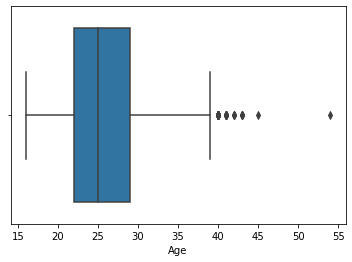

In [41]:
sns.boxplot(x=df["Age"])

In [42]:
q3,q1=np.percentile(df["Age"],[75,25])
IQR=q3-q1
min_=q1-(1.5*IQR)
max_=q3+(1.5*IQR)
q3,q1,min_,max_

(29.0, 22.0, 11.5, 39.5)

In [43]:
df=df[~(df["Age"]>=39.5)]

### Let's make some inferences before we go to Tableau.

In [44]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value_€,Wage_€,PreferredFoot,...,Positioning,Vision,Penalties,Composure,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,BestPosition
0,212198,Bruno Fernandes,26,Portugal,88,89,Manchester United,107500000.0,250000,Right,...,87.0,90.0,91.0,87.0,12.0,14.0,15.0,8.0,14.0,CAM
1,209658,L. Goretzka,26,Germany,87,88,FC Bayern München,93000000.0,140000,Right,...,85.0,84.0,60.0,82.0,13.0,8.0,15.0,11.0,9.0,CM
2,176580,L. Suárez,34,Uruguay,88,88,Atlético de Madrid,44500000.0,135000,Right,...,91.0,84.0,83.0,87.0,27.0,25.0,31.0,33.0,37.0,ST
3,192985,K. De Bruyne,30,Belgium,91,91,Manchester City,125500000.0,350000,Right,...,88.0,94.0,83.0,89.0,15.0,13.0,5.0,10.0,13.0,CM
4,224334,M. Acuña,29,Argentina,84,84,Sevilla FC,37000000.0,45000,Left,...,81.0,82.0,76.0,87.0,8.0,14.0,13.0,13.0,14.0,LB


In [45]:
df.groupby("Nationality")["Value_€"].mean()

Nationality
Afghanistan    8.250000e+05
Albania        2.668438e+06
Algeria        6.568276e+06
Andorra        4.000000e+05
Angola         3.020000e+06
                   ...     
Venezuela      2.428258e+06
Vietnam        4.625000e+05
Wales          1.547728e+06
Zambia         4.305000e+06
Zimbabwe       2.891250e+06
Name: Value_€, Length: 168, dtype: float64

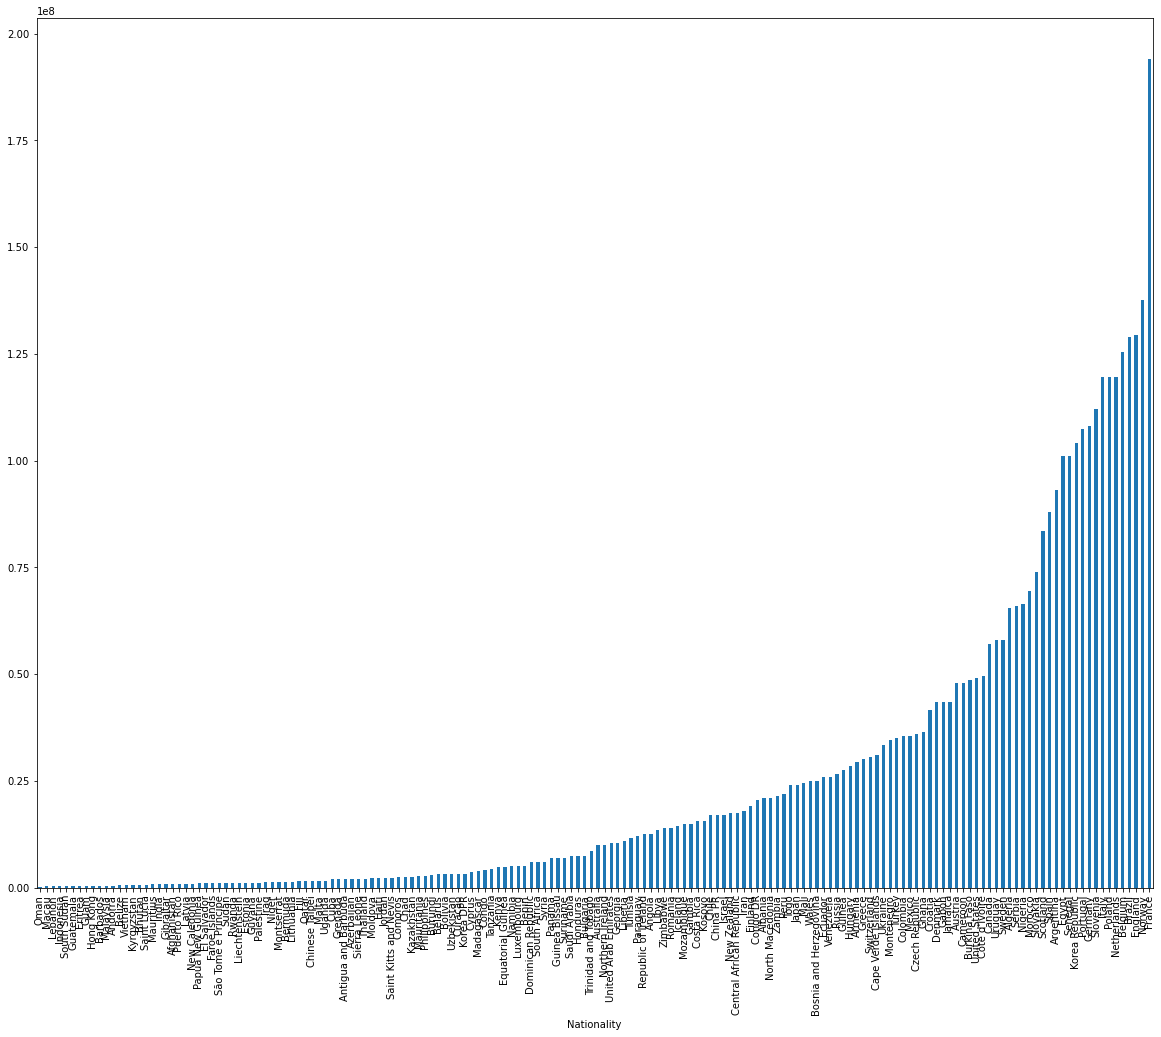

In [46]:
plt.figure(figsize=(20,16))
df.groupby(["Nationality"])["Value_€"].max().sort_values().plot(kind="bar")
plt.show()

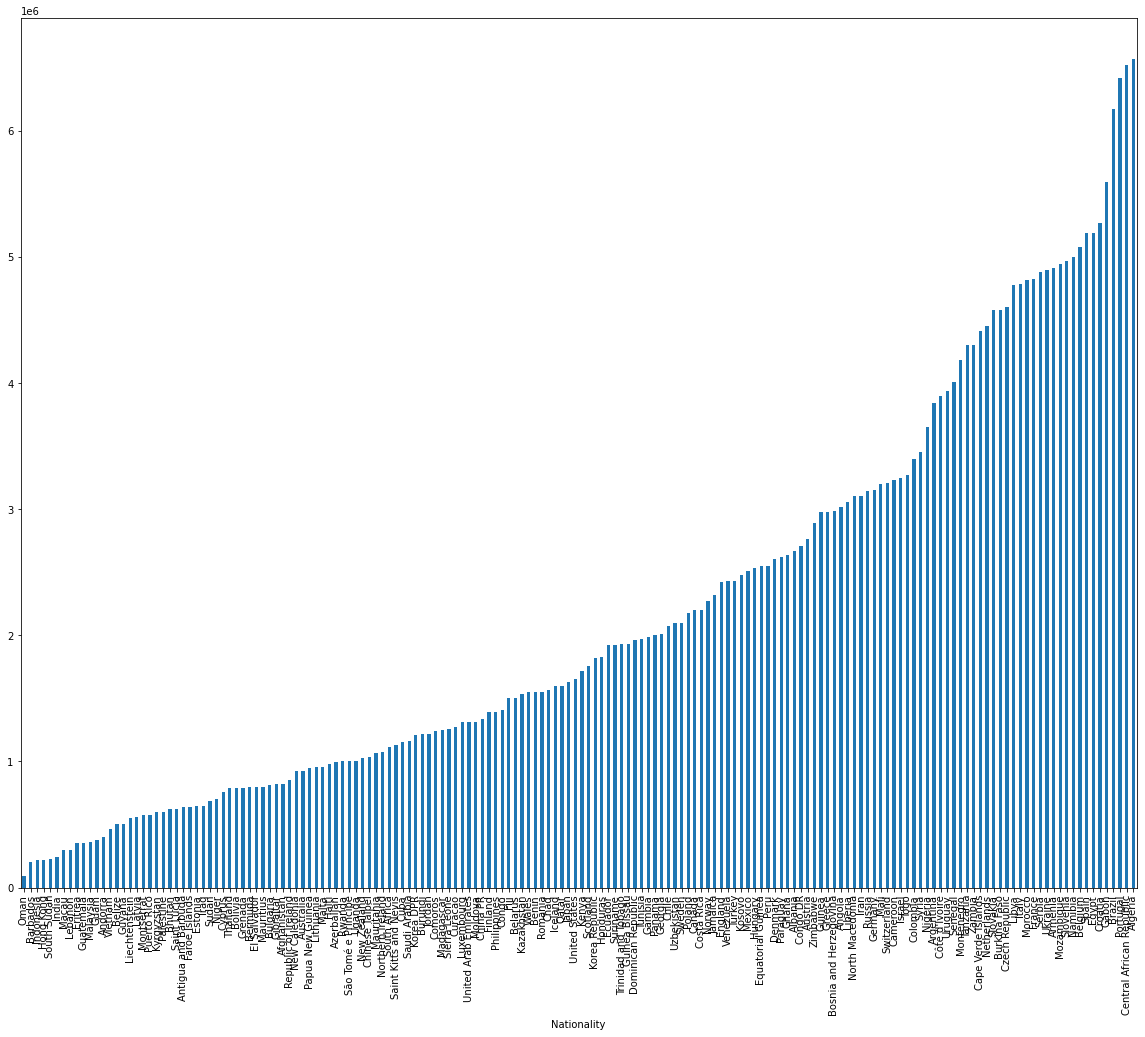

In [47]:
plt.figure(figsize=(20,16))
df.groupby(["Nationality"])["Value_€"].mean().sort_values().plot(kind="bar")
plt.show()

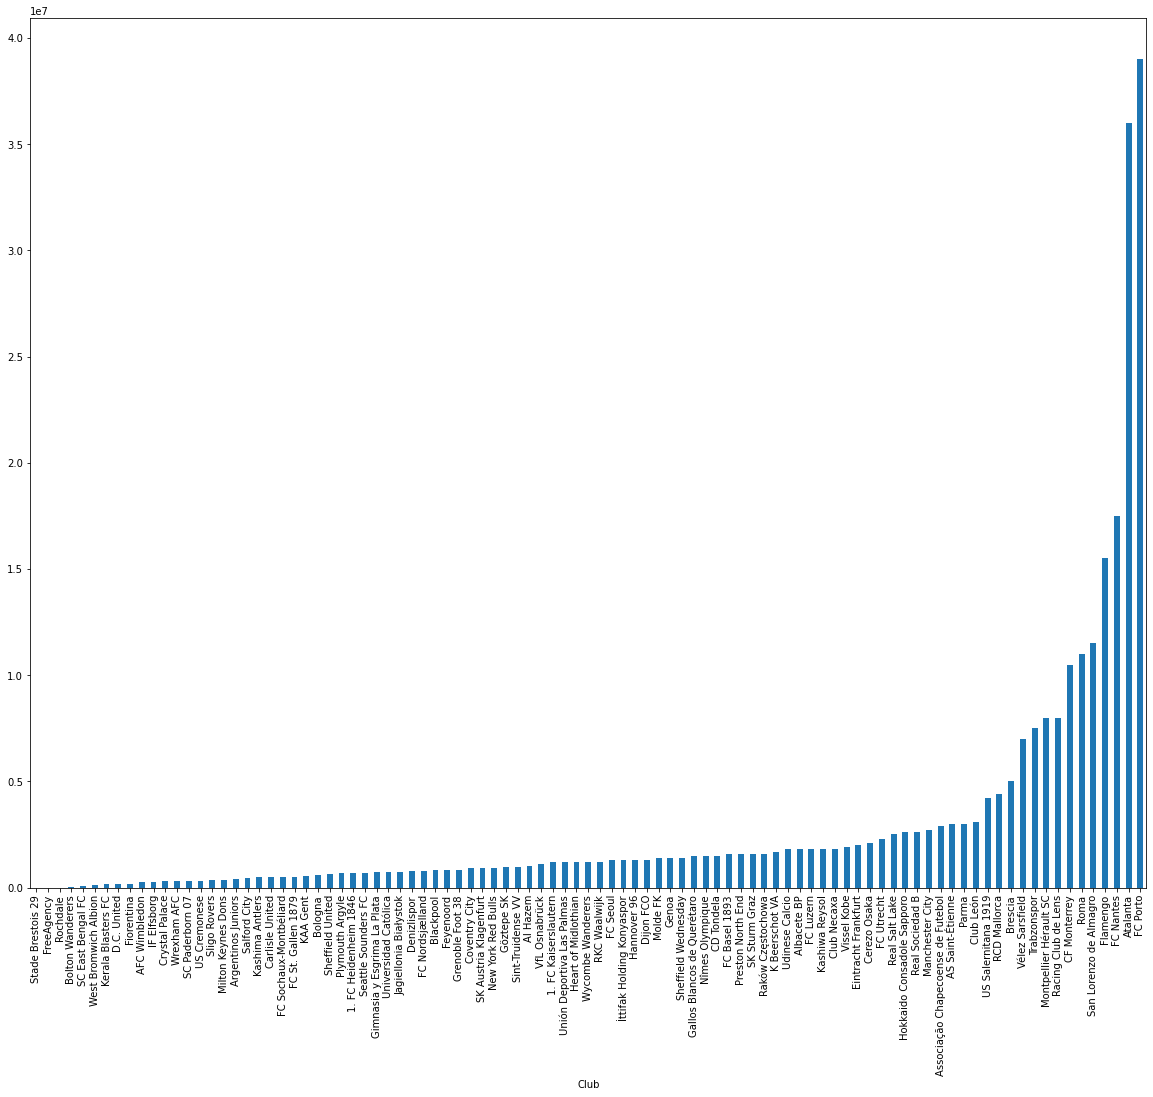

In [48]:
plt.figure(figsize=(20,16))
df.sample(100).groupby(["Club"])["Value_€"].mean().sort_values().plot(kind="bar")
plt.show()

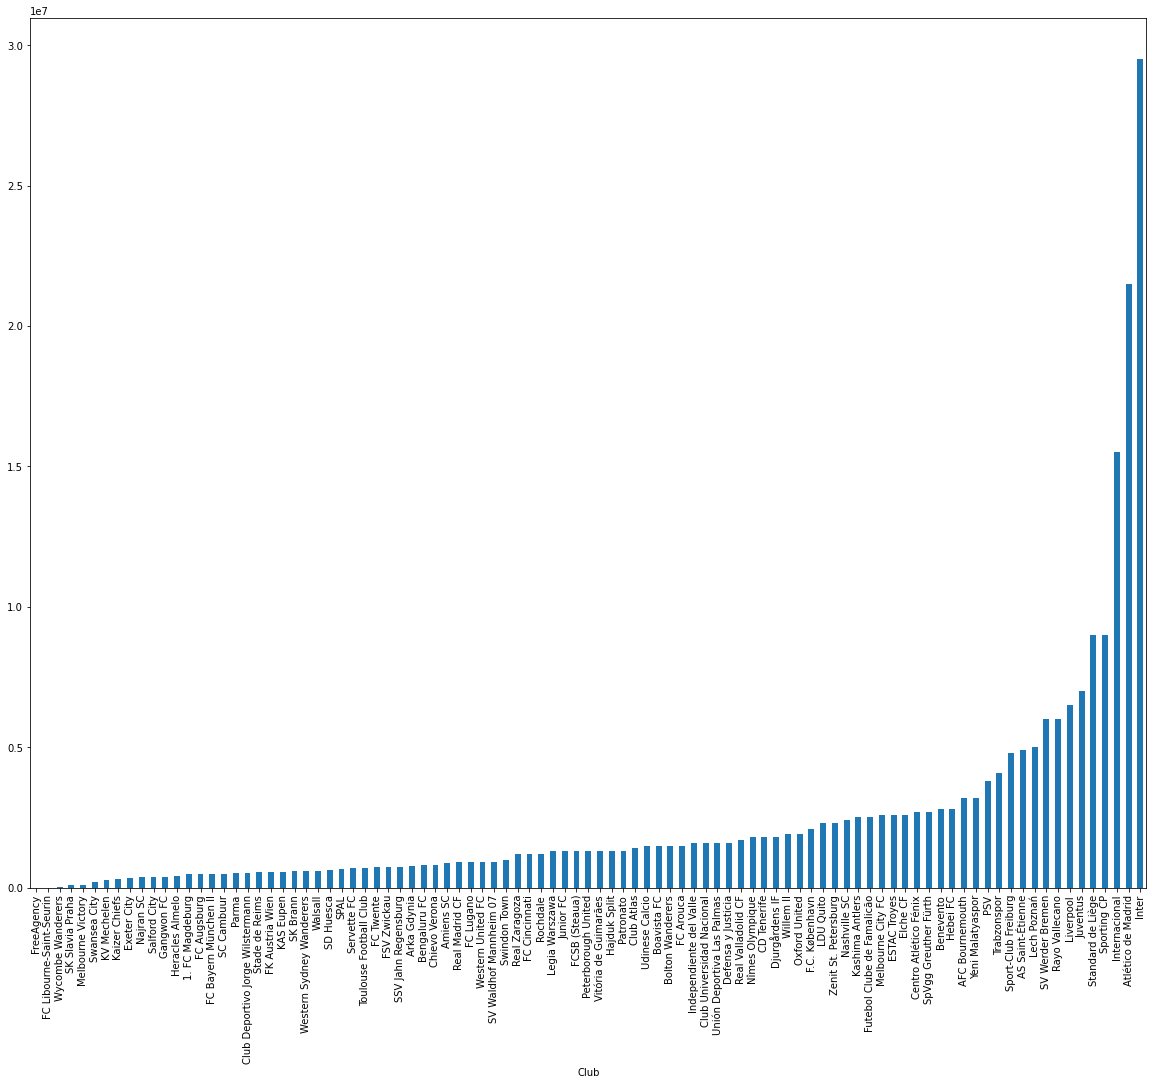

In [49]:
plt.figure(figsize=(20,16))
df.sample(100).groupby(["Club"])["Value_€"].max().sort_values().plot(kind="bar")
plt.show()

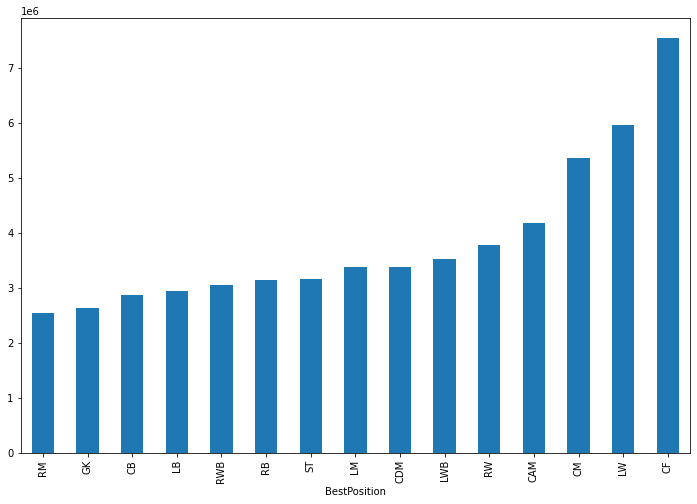

In [50]:
plt.figure(figsize=(12,8))
df.groupby(["BestPosition"])["Value_€"].mean().sort_values().plot(kind="bar")
plt.show()

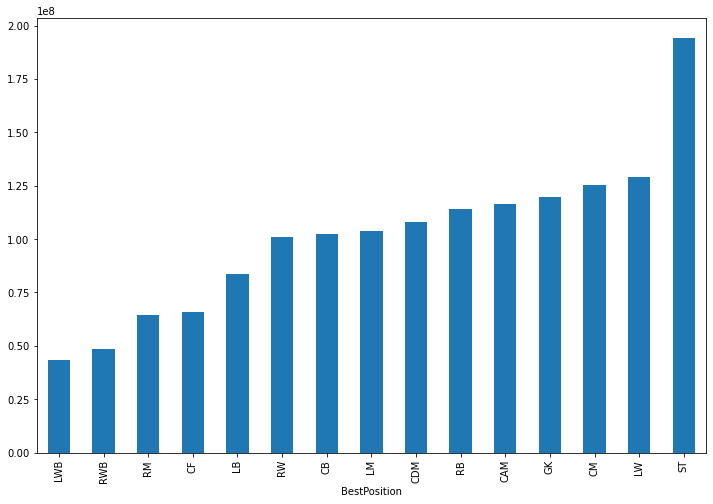

In [51]:
plt.figure(figsize=(12,8))
df.groupby(["BestPosition"])["Value_€"].max().sort_values().plot(kind="bar")
plt.show()

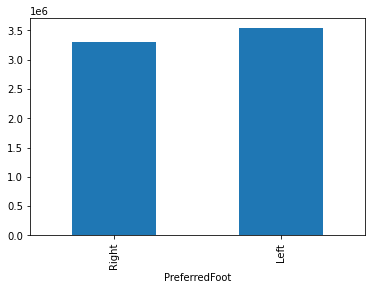

In [52]:
df.groupby(["PreferredFoot"])["Value_€"].mean().sort_values().plot(kind="bar")
plt.show()

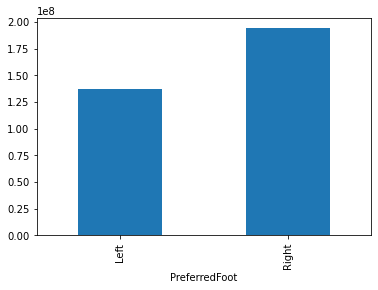

In [53]:
df.groupby(["PreferredFoot"])["Value_€"].max().sort_values().plot(kind="bar")
plt.show()

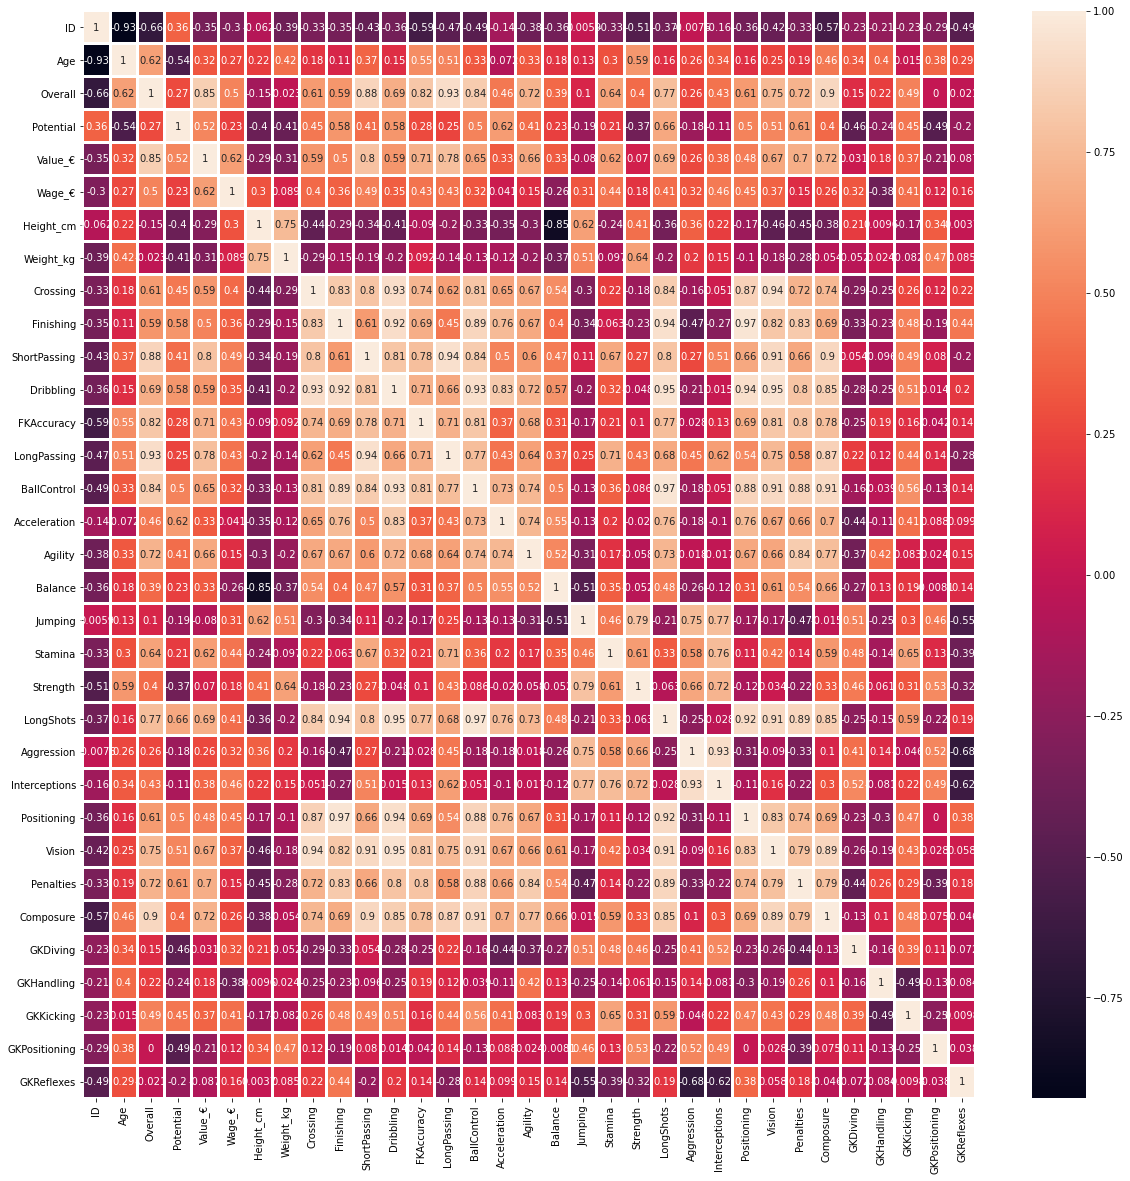

In [54]:
plt.figure(figsize=(20,20))
sns.heatmap(df.sample(10).corr(),annot=True,linewidths=2)
plt.show()

### Our EDA and data preprocessing ended. Now we will use Tableau for making dashboard.
### Before we go to Tableau let's check our data.

In [55]:
df.isnull().sum().sum()

0

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16667 entries, 0 to 16709
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             16667 non-null  int64  
 1   Name           16667 non-null  object 
 2   Age            16667 non-null  int64  
 3   Nationality    16667 non-null  object 
 4   Overall        16667 non-null  int64  
 5   Potential      16667 non-null  int64  
 6   Club           16667 non-null  object 
 7   Value_€        16667 non-null  float64
 8   Wage_€         16667 non-null  int64  
 9   PreferredFoot  16667 non-null  object 
 10  Height_cm      16667 non-null  int64  
 11  Weight_kg      16667 non-null  float64
 12  Crossing       16667 non-null  float64
 13  Finishing      16667 non-null  float64
 14  ShortPassing   16667 non-null  float64
 15  Dribbling      16667 non-null  float64
 16  FKAccuracy     16667 non-null  float64
 17  LongPassing    16667 non-null  float64
 18  BallCo